<h2> DATA VISUALIZAION</H2>
<h4> Lab 4 </h4>
<h4 align="right">Utkarsh Bhangale<br>2020802124</h4>

In [ ]:
from sklearn.datasets import load_iris
iris= load_iris()
import pandas as pd

In [ ]:
df = pd.read_csv("/content/Iris.csv")

## Basic Analysis

In [ ]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.shape


(150, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.value_counts("Species")


Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

## DATA VISUALIZATION

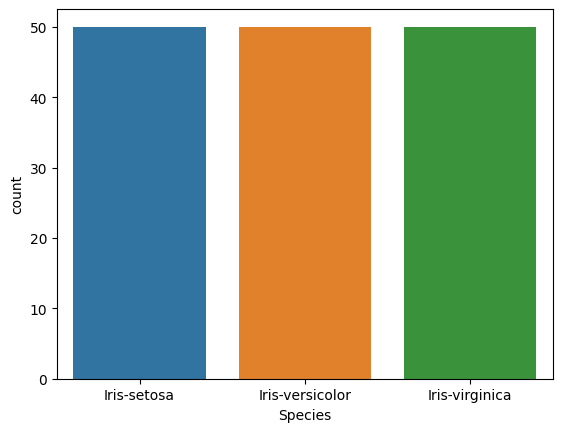

In [ ]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt


sns.countplot(x='Species', data=df, )
plt.show()


## Bi-variate Analysis
### Histograms

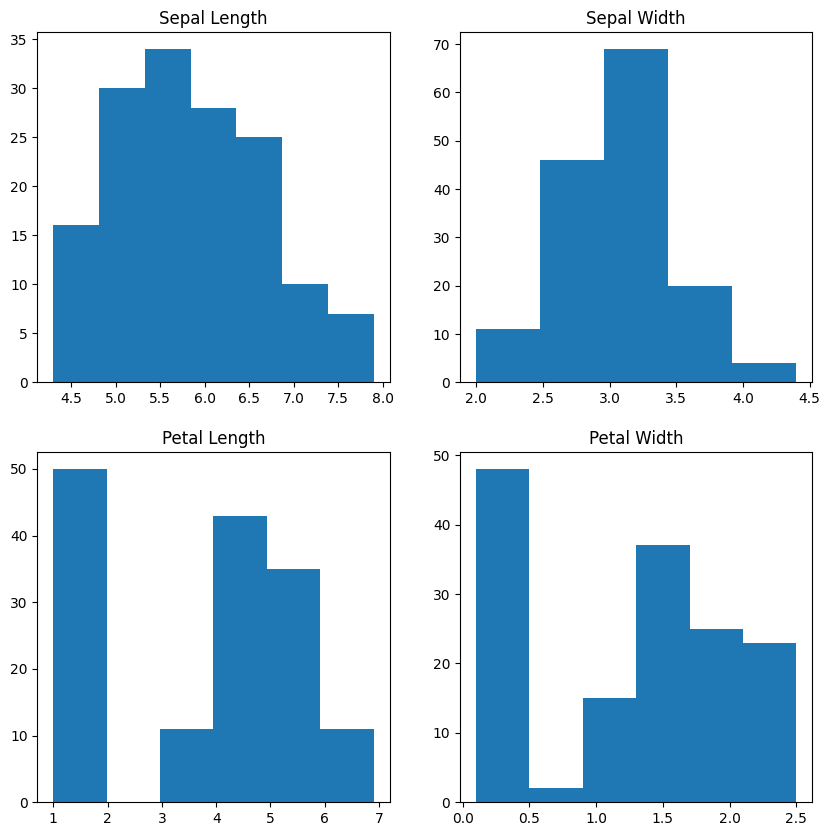

In [ ]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt


fig, axes = plt.subplots(2, 2, figsize=(10,10))

axes[0,0].set_title("Sepal Length")
axes[0,0].hist(df['SepalLengthCm'], bins=7)

axes[0,1].set_title("Sepal Width")
axes[0,1].hist(df['SepalWidthCm'], bins=5);

axes[1,0].set_title("Petal Length")
axes[1,0].hist(df['PetalLengthCm'], bins=6);

axes[1,1].set_title("Petal Width")
axes[1,1].hist(df['PetalWidthCm'], bins=6);


### Boxplot

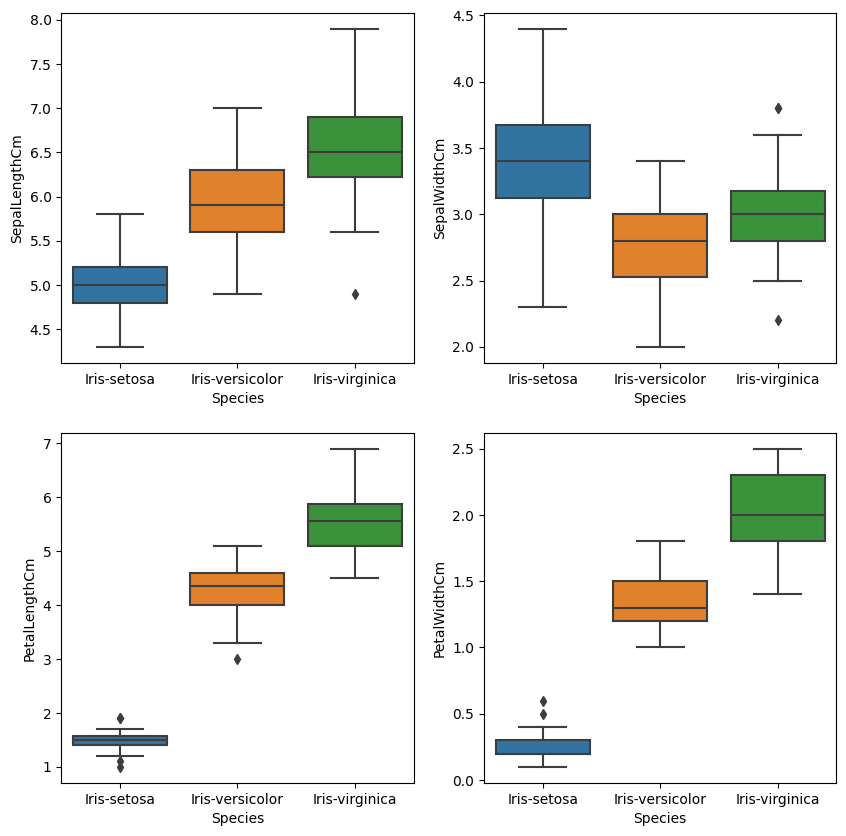

In [ ]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt

def graph(y):
	sns.boxplot(x="Species", y=y, data=df)

plt.figure(figsize=(10,10))

# Adding the subplot at the specified
# grid position
plt.subplot(221)
graph('SepalLengthCm')

plt.subplot(222)
graph('SepalWidthCm')

plt.subplot(223)
graph('PetalLengthCm')

plt.subplot(224)
graph('PetalWidthCm')

plt.show()


## Removing Outliers
### Sepal Width

Old Shape:  (150, 6)
New Shape:  (146, 6)


<ipython-input-45-46d5a6bf15b0>:11: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df['SepalWidthCm'], 25,
<ipython-input-45-46d5a6bf15b0>:14: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df['SepalWidthCm'], 75,


<Axes: xlabel='SepalWidthCm'>

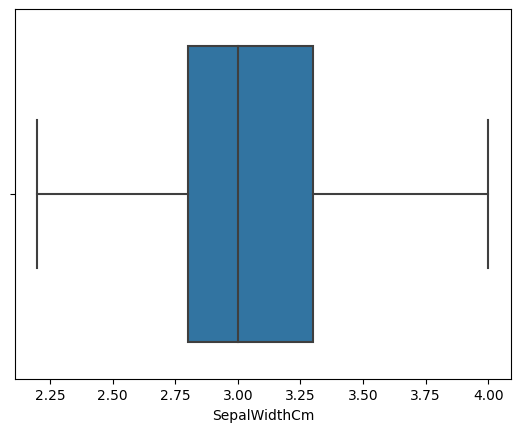

In [ ]:
# Importing
import sklearn
import pandas as pd
import seaborn as sns
import numpy as np

# Load the dataset
df = pd.read_csv('Iris.csv')

# IQR
Q1 = np.percentile(df['SepalWidthCm'], 25,
				interpolation = 'midpoint')

Q3 = np.percentile(df['SepalWidthCm'], 75,
				interpolation = 'midpoint')
IQR = Q3 - Q1

print("Old Shape: ", df.shape)

# Upper bound
upper = np.where(df['SepalWidthCm'] >= (Q3+1.5*IQR))

# Lower bound
lower = np.where(df['SepalWidthCm'] <= (Q1-1.5*IQR))

# Removing the Outliers
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

print("New Shape: ", df.shape)

sns.boxplot(x='SepalWidthCm', data=df)


### Sepal Length

Old Shape:  (150, 6)
New Shape:  (150, 6)


<ipython-input-47-31803aa77bb5>:11: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df['SepalLengthCm'], 25,
<ipython-input-47-31803aa77bb5>:14: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df['SepalLengthCm'], 75,


<Axes: xlabel='SepalLengthCm'>

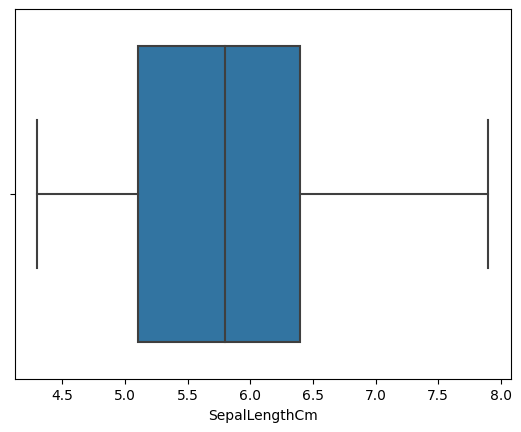

In [ ]:
# Load the dataset
df = pd.read_csv('Iris.csv')

# IQR
Q1 = np.percentile(df['SepalLengthCm'], 25,
				interpolation = 'midpoint')

Q3 = np.percentile(df['SepalLengthCm'], 75,
				interpolation = 'midpoint')
IQR = Q3 - Q1

print("Old Shape: ", df.shape)

# Upper bound
upper = np.where(df['SepalLengthCm'] >= (Q3+1.5*IQR))

# Lower bound
lower = np.where(df['SepalLengthCm'] <= (Q1-1.5*IQR))

# Removing the Outliers
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

print("New Shape: ", df.shape)

sns.boxplot(x='SepalLengthCm', data=df)

### Petal Length

Old Shape:  (150, 6)
New Shape:  (150, 6)


<ipython-input-48-397f8315ca90>:11: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df['PetalLengthCm'], 25,
<ipython-input-48-397f8315ca90>:14: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df['PetalLengthCm'], 75,


<Axes: xlabel='PetalLengthCm'>

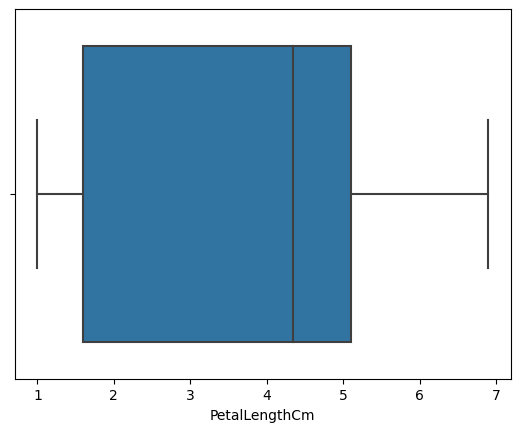

In [ ]:
# Importing
import sklearn
import pandas as pd
import seaborn as sns
import numpy as np

# Load the dataset
df = pd.read_csv('Iris.csv')

# IQR
Q1 = np.percentile(df['PetalLengthCm'], 25,
				interpolation = 'midpoint')

Q3 = np.percentile(df['PetalLengthCm'], 75,
				interpolation = 'midpoint')
IQR = Q3 - Q1

print("Old Shape: ", df.shape)

# Upper bound
upper = np.where(df['PetalLengthCm'] >= (Q3+1.5*IQR))

# Lower bound
lower = np.where(df['PetalLengthCm'] <= (Q1-1.5*IQR))

# Removing the Outliers
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

print("New Shape: ", df.shape)

sns.boxplot(x='PetalLengthCm', data=df)

### Petal                                                                                                                                        Width

Old Shape:  (150, 6)
New Shape:  (150, 6)


<ipython-input-49-733cfefbd1c7>:11: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df['PetalWidthCm'], 25,
<ipython-input-49-733cfefbd1c7>:14: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df['PetalWidthCm'], 75,


<Axes: xlabel='PetalWidthCm'>

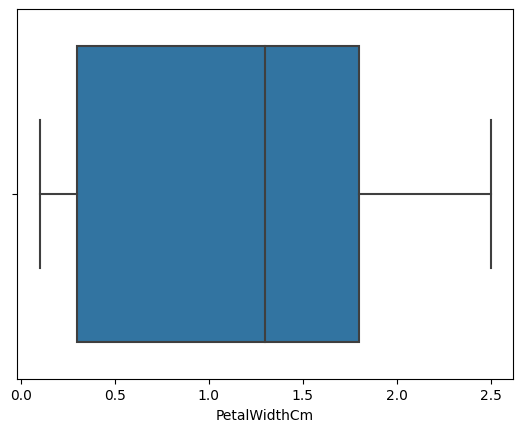

In [ ]:
# Importing
import sklearn
import pandas as pd
import seaborn as sns
import numpy as np

# Load the dataset
df = pd.read_csv('Iris.csv')

# IQR
Q1 = np.percentile(df['PetalWidthCm'], 25,
				interpolation = 'midpoint')

Q3 = np.percentile(df['PetalWidthCm'], 75,
				interpolation = 'midpoint')
IQR = Q3 - Q1

print("Old Shape: ", df.shape)

# Upper bound
upper = np.where(df['PetalWidthCm'] >= (Q3+1.5*IQR))

# Lower bound
lower = np.where(df['PetalWidthCm'] <= (Q1-1.5*IQR))

# Removing the Outliers
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

print("New Shape: ", df.shape)

sns.boxplot(x='PetalWidthCm', data=df)

## Conclusion


### The visualizations provide useful insights into the features of the Iris dataset.

### The four numeric features - sepal length, sepal width, petal length, and petal width - were explored using histograms and boxplots.

### The histograms showed that sepal length, sepal width, and petal length appeared to follow normal distributions, with no strong skews. petal width and petal Length, however, was right skewed with a long tail.

### The boxplots further illustrated that petal width and petal Length had several potential outliers. No extreme outliers were observed for the other three features.

### In summary, most features were relatively normally distributed except for petal width and petal Length which exhibited a skewed distribution and contained outliers. These visualizations allow us to quickly understand the shape and spread of each feature's distribution before applying machine learning algorithms. Identifying outliers is especially important as they can strongly influence models if not handled properly. Overall, data visualization provided useful insights into the underlying patterns in the Iris dataset.